In [1]:
%%html
<style> 
    table {margin-left: 0 } !important;}
</style>
<style type="text/css">
    table.dataframe td, table.dataframe th {border: 1px solid lightgray;}
</style>

<img src="http://drive.google.com/uc?export=view&id=1zJjN-vEjutF__7wpEq5Yibxv9BRZeC74"
     alt="HCA Logo" height="150" width="150"
     style="float: left; margin-right: 10px;">

|Name  | Value |
| :- |:-------------: |
| Algo Name :  | HCA_Fundamentals_Live.py|
| Algo Version   :  | v001  |
| Algo Date   :  | 2021-07-20 |
|  | |
| Notebook:  | HotChili Trader Tear Sheet |
| Version:  | 2.0.0 |
| Date:  | 2021-07-16  |
| Copyright:  | @2019-2021 |
| Company:  | HotChili Analytics, LLC |
| Authors   :  | Alan & Jeff Coppola, Anthony Garner |


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')
### %pylab inline
###figsize(12, 12)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pd.set_option("max_colwidth", 400)
pd.set_option("display.max_rows", 100000)
pd.set_option("display.max_columns", 1000)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
ALGOS_DIR = '/home/hca-ws2004/hca/hca-resources/HCA_In_and_Out/'                
algo_fn_str = ALGOS_DIR + 'HCA_In_and_Out_Live-gld-lb95.py'
OUT_PATH    = ALGOS_DIR + 'HCA_In_and_Out_Bot/logs/' + 'HCA_In_and_Out_Live-gld-lb95.pkl'
CAPITAL_BASE = '10000.0'
 

# Parameters for location of zipline-broker run
#hca/hca-resources/HCA_Fundamentals/fund_bt.pkl
#hca/hca-resources/HCA_Fundamentals/fund_bt.pkl
nb_dir = ALGOS_DIR
ans_pkl = OUT_PATH

#ans_data_file = nb_dir + ans_pkl

# Read in backtest results for analysis
perf=pd.read_pickle(ans_pkl)

In [6]:
perf.columns
#dir(perf)

Index(['algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'leverage', 'long_exposure',
       'long_value', 'longs_count', 'max_drawdown', 'max_leverage',
       'net_leverage', 'orders', 'period_close', 'period_label', 'period_open',
       'pnl', 'portfolio_value', 'positions', 'returns', 'sharpe',
       'short_exposure', 'short_value', 'shorts_count', 'sortino',
       'starting_cash', 'starting_exposure', 'starting_value', 'trading_days',
       'transactions', 'treasury_period_return'],
      dtype='object')

In [5]:
perf.shape

(504, 38)

In [ ]:
fig        = plt.figure()
     
##bt_df = bt_df.rename(columns={'equity': self.strat.asset_sym})
#bt_df['MeanRev-'+self.strat.asset_sym] = (bt_df[['equity']].pct_change()+1.).cumprod()
#bt_df['Close-'+self.strat.asset_sym] = (bt_df[['Close']].pct_change()+1.).cumprod()
                
for channel_name in ['MeanRev-'+self.strat.asset_sym, 'Close-'+self.strat.asset_sym]:
    plt.plot(channel_name, data=bt_df,
            marker='', linewidth=2, label=channel_name)
    fig.autofmt_xdate()         
    plt.legend()
    

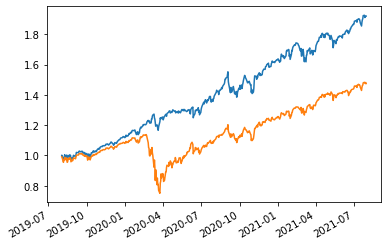

In [15]:
tr_data=(perf['algorithm_period_return'] +1.)
bm_data=(perf['benchmark_period_return'] + 1.)
#perf_df = pd.DataFrame(
#    data=(perf['algorithm_period_return'] +1.)
tr_data.plot()
bm_data.plot()

In [7]:
import pandas as pd
returns, positions, transactions= pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [8]:
#positions

In [9]:
#transactions

In [10]:
import sys

print("Tear Sheet File : {}".format(ans_data_file))
print("-----------------------------------")
print("Python version={}".format(sys.version))
print("Matplotlib version={}".format(mp.__version__))
print("Numpy version={}".format(np.version.version))


Tear Sheet File : /home/hca-ws2004/hca/hca-resources/HCA_Fundamentals/HCA_Fundamentals_Live.pkl
-----------------------------------
Python version=3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
Matplotlib version=3.1.1
Numpy version=1.14.0


In [11]:
#pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

In [12]:
#returns.plot()

In [13]:
#transactions

In [14]:
#from datetime import datetime
#import pytz
#start = datetime(2017, 2, 11, 0, 0, 0, 0, pytz.utc)
#end = datetime(2019, 3, 14, 0, 0, 0, 0, pytz.utc)
#s=pd.Timestamp(start)

In [15]:
#pf.create_position_tear_sheet(returns=returns,positions=positions)
#pf.plot_perf_stats(returns= returns, factor_returns=returns)

In [16]:
sim_start=perf.index[0]
sim_end= perf.index[-1]
print("start={}  end={}".format(sim_start,sim_end))


start=2019-01-02 00:00:00+00:00  end=2021-07-19 00:00:00+00:00


Entire data start date: 2019-01-03
Entire data end date: 2021-07-19
In-sample months: 26
Out-of-sample months: 4


All                         In-sample                  \
                       mean  median      5%     95%      mean  median      5%   
Annual return         44.8%   42.1%   -0.6%  102.5%     57.9%   54.7%    6.8%   
Cumulative returns   176.2%  144.3%    8.3%  451.8%    187.9%  162.0%   12.9%   
Annual volatility     32.6%   32.6%   28.9%   36.5%     34.2%   34.2%   30.0%   
Sharpe ratio           1.29    1.29    0.09    2.44      1.39    1.39    0.24   
Calmar ratio           1.81    1.42    0.01    4.73      2.22    1.68    0.03   
Stability              0.68    0.79    0.05    0.96      0.71    0.82    0.09   
Max drawdown         -31.7%  -29.9%  -50.3%  -18.3%    -30.2%  -28.6%  -47.4%   
Omega ratio            1.31    1.30    1.05    1.59      1.34    1.33    1.06   
Sortino ratio          1.93    1.81    0.34    4.03      2.09    2.02    0.34   
Skew                  -0.69   -0.72   -1.76    0.41     -0.65   -0.69   -1.69   
Kurtosis              10.55   10.60    6.70   14.10      9.75    9.91    5.71   
Tail ratio             1.07    1.06    0.88    1.29      1.09    1.09    0.85   
Daily value at risk   -3.9%   -3.9%   -4.5%   -3.4%     -4.2%   -4.1%   -4.8%   
Alpha                  0.68    0.66    0.19    1.27      0.83    0.79    0.24   
Beta                  -0.34   -0.34   -0.55   -0.11     -0.35   -0.35   -0.56   

                            Out-of-sample                         
                        95%          mean  median      5%    95%  
Annual return        125.0%          1.7%   -2.9%  -43.9%  62.1%  
Cumulative returns   445.7%         -1.7%   -2.6%  -17.7%  18.0%  
Annual volatility     38.6%         18.2%   18.2%   15.7%  20.7%  
Sharpe ratio           2.47         -0.11   -0.11   -2.79   2.52  
Calmar ratio           6.12          1.07   -0.32   -2.15   9.79  
Stability              0.96          0.43    0.44    0.01   0.88  
Max drawdown         -18.1%        -12.5%  -11.5%  -22.7%  -5.6%  
Omega ratio            1.65          1.01    0.97    0.62   1.52  
Sortino ratio          4.00         -0.11   -0.43   -3.29   4.21  
Skew                   0.56         -0.35   -0.36   -0.77   0.07  
Kurtosis              13.33          0.49    0.44   -0.16   1.27  
Tail ratio             1.34          0.88    0.84    0.50   1.41  
Daily value at risk   -3.6%         -2.3%   -2.3%   -2.7%  -1.9%  
Alpha                  1.60         -0.01   -0.06   -0.45   0.60  
Beta                  -0.14          0.06    0.05   -0.21   0.32

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.04,2020-01-21,2020-03-18,2020-05-27,92
1,12.23,2020-10-12,2020-10-30,2020-11-09,21
2,10.44,2020-08-03,2020-09-23,2020-10-08,49
3,10.34,2019-07-26,2019-08-27,2019-11-12,78
4,8.75,2020-06-08,2020-06-11,2020-06-22,11


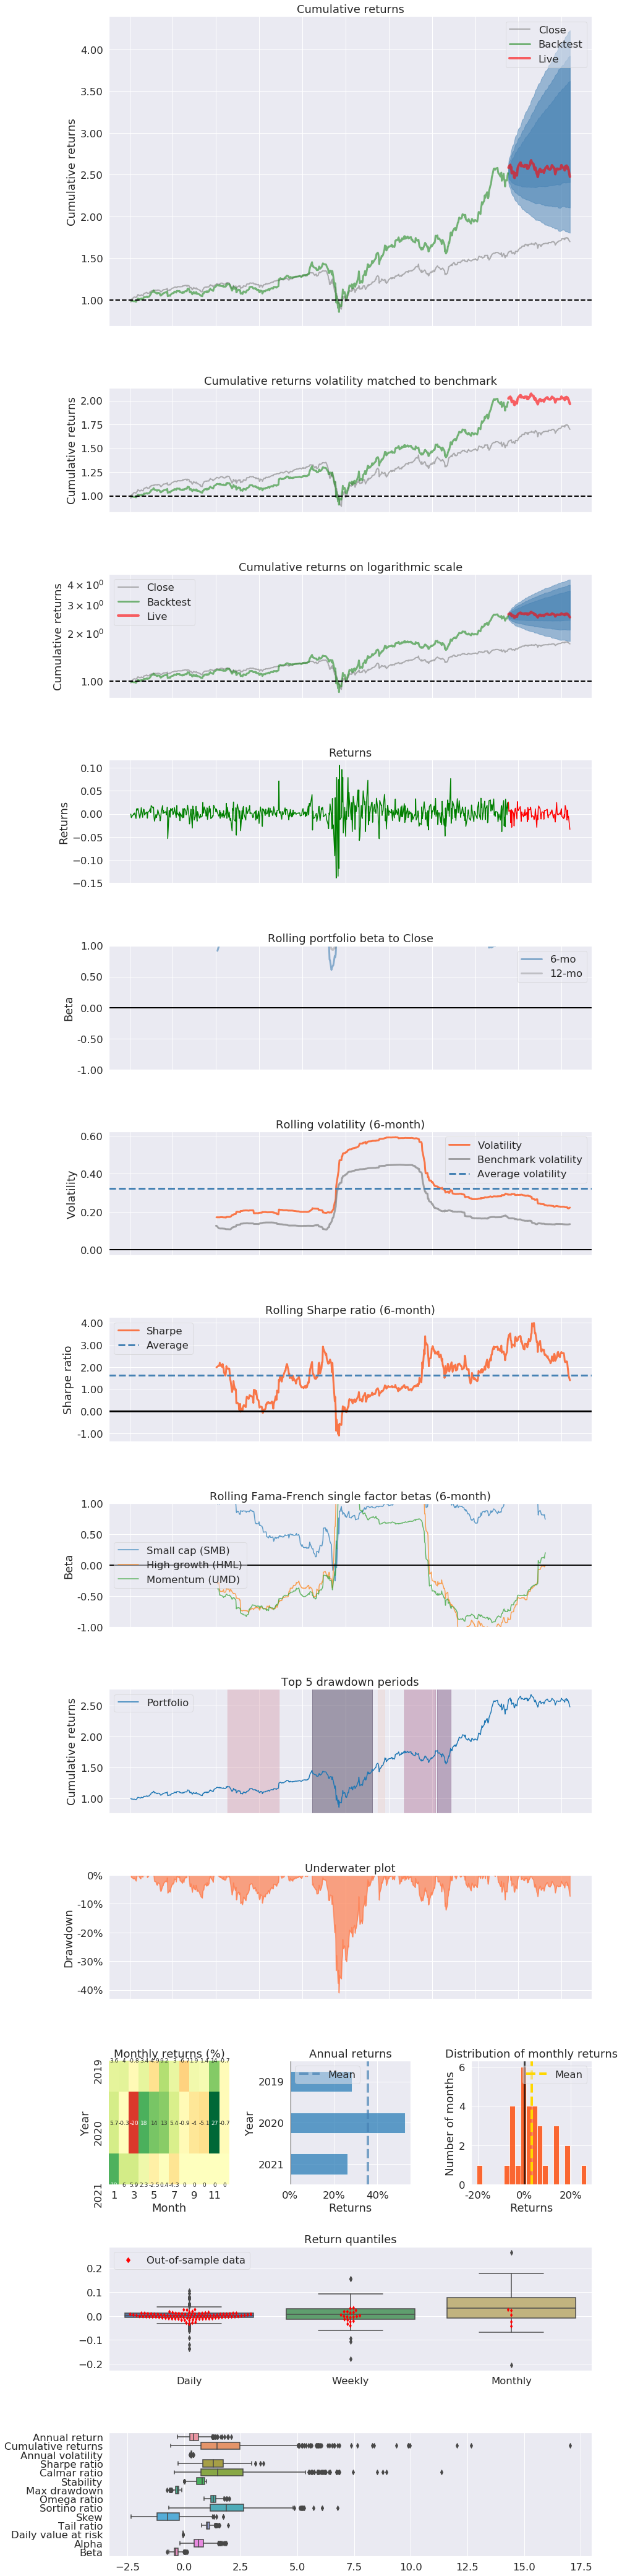

Stress Events,mean,min,max
New Normal,0.16%,-13.94%,10.54%


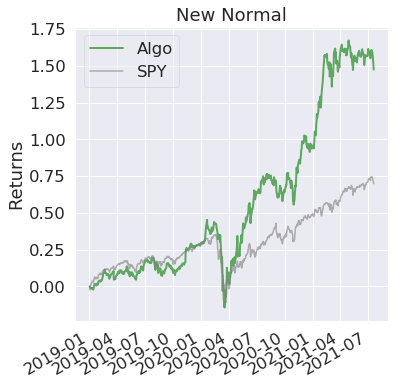

Top 10 long positions of all time,max
IEF,102.63%
HHLA,15.83%
LOKM,13.53%
NVAX,12.29%
CFACU,12.28%
LOV,11.57%
NVTA,11.13%
DXLG,11.11%
CPLG,10.66%
AMPY,10.50%


Top 10 short positions of all time,max
LOKM,-12.00%
DXLG,-3.39%
CFACU,-1.83%


Top 10 positions of all time,max
IEF,102.63%
HHLA,15.83%
LOKM,13.53%
NVAX,12.29%
CFACU,12.28%
LOV,11.57%
NVTA,11.13%
DXLG,11.11%
CPLG,10.66%
AMPY,10.50%


All positions ever held,max
IEF,102.63%
HHLA,15.83%
LOKM,13.53%
NVAX,12.29%
CFACU,12.28%
LOV,11.57%
NVTA,11.13%
DXLG,11.11%
CPLG,10.66%
AMPY,10.50%


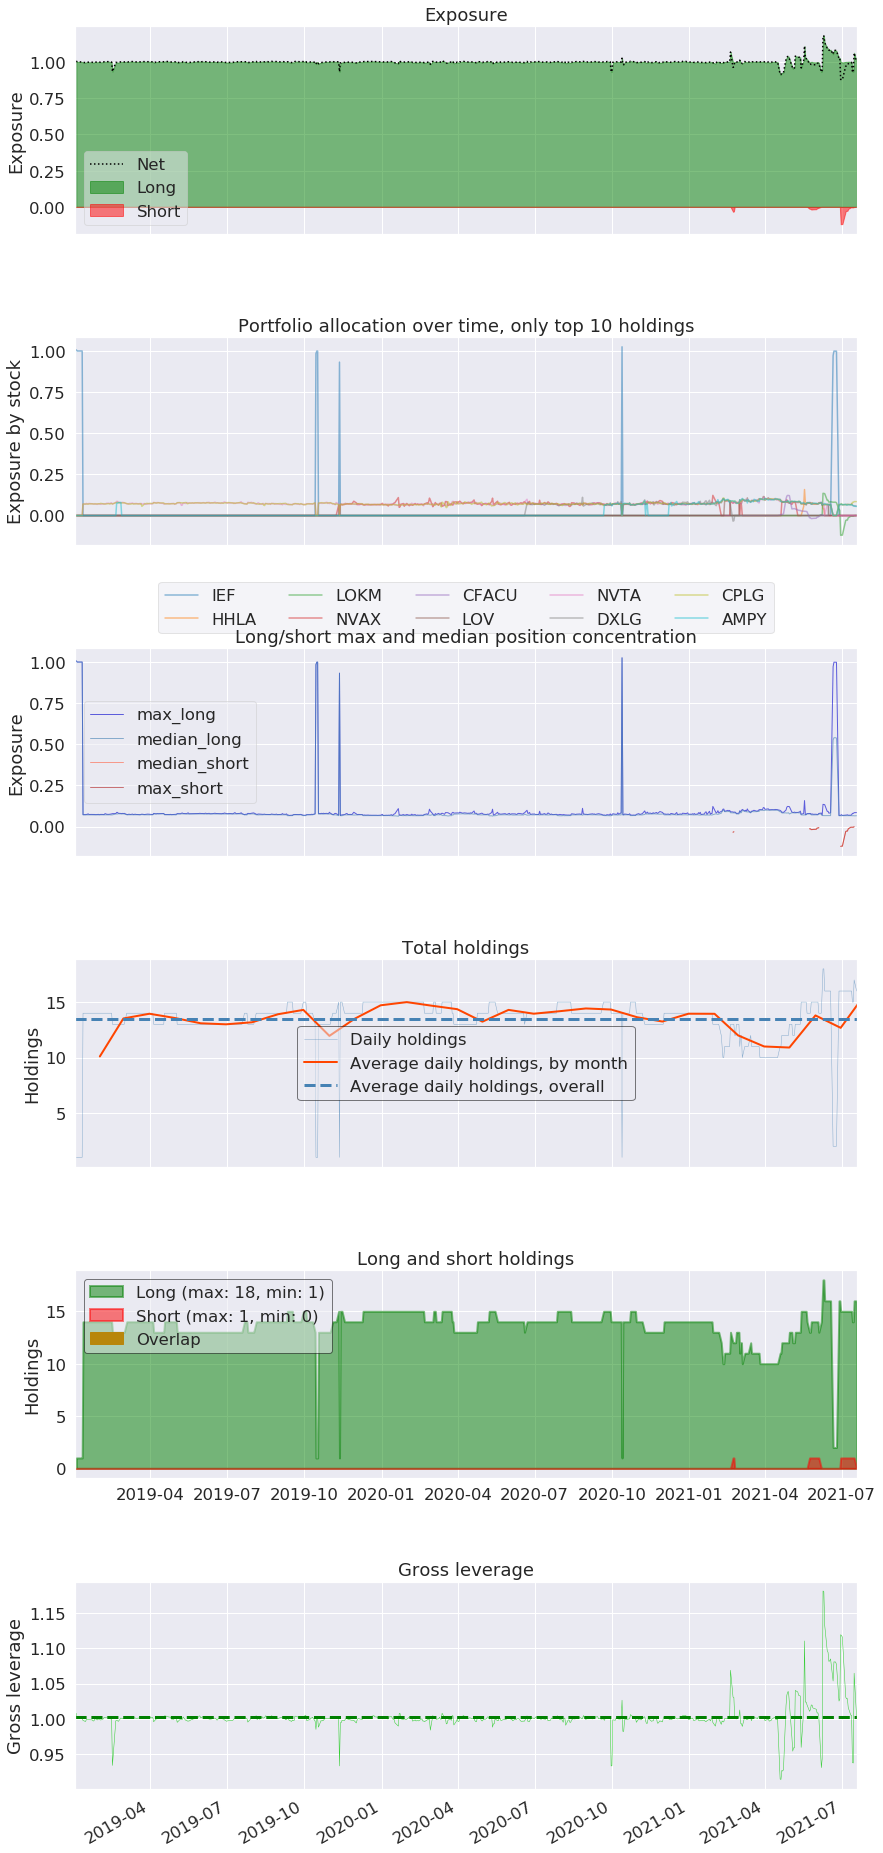

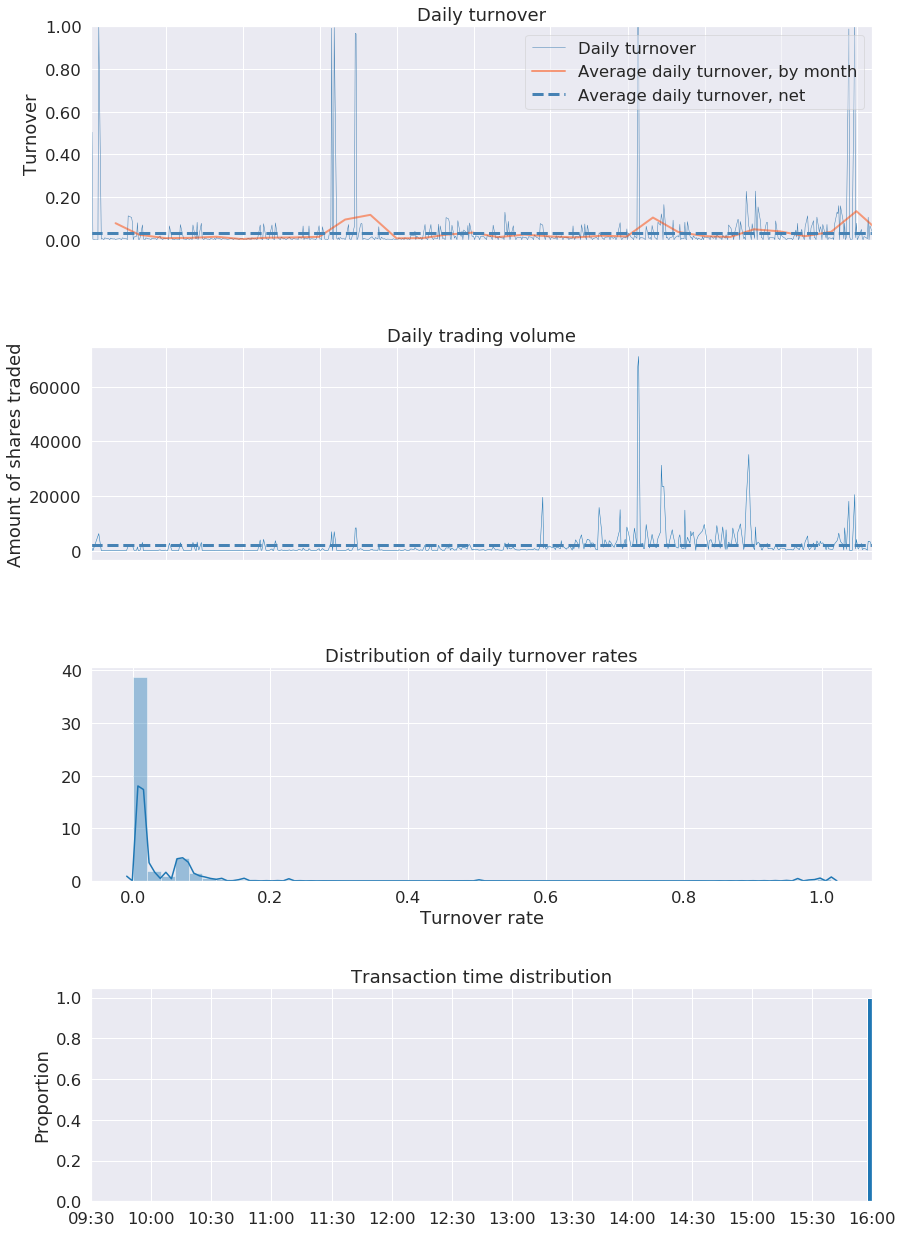

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,2710.00,16.00,2694.00
Percent profitable,0.64,0.56,0.64
Winning round_trips,1727.00,9.00,1718.00
Losing round_trips,983.00,7.00,976.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$148608.34,$-332.94,$148941.28
Gross profit,$292241.41,$197.44,$292043.97
Gross loss,$-143633.07,$-530.37,$-143102.69
Profit factor,$2.03,$0.37,$2.04
Avg. trade net profit,$54.84,$-20.81,$55.29
Avg. winning trade,$169.22,$21.94,$169.99
Avg. losing trade,$-146.12,$-75.77,$-146.62
Ratio Avg. Win:Avg. Loss,$1.16,$0.29,$1.16
Largest winning trade,$13361.81,$166.94,$13361.81
Largest losing trade,$-7701.09,$-495.13,$-7701.09


Duration stats,All trades,Short trades,Long trades
Avg duration,79 days 20:55:38.307749,8 days 07:14:59.937500,80 days 07:07:43.702672
Median duration,70 days 00:00:00,8 days 12:00:00,70 days 23:00:00
Longest duration,307 days 23:00:00,19 days 00:00:00,307 days 23:00:00
Shortest duration,0 days 19:59:59,0 days 19:59:59,1 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.03%,-0.01%,0.03%
Avg returns winning,0.10%,0.01%,0.10%
Avg returns losing,-0.09%,-0.03%,-0.09%
Median returns all round_trips,0.00%,0.00%,0.00%
Median returns winning,0.02%,0.00%,0.02%
Median returns losing,-0.01%,-0.00%,-0.01%
Largest winning trade,7.27%,0.07%,7.27%
Largest losing trade,-4.43%,-0.20%,-4.43%


Symbol stats,AFIN,ALG,ALSN,ALTO,AMPY,APR,ASAQ,BPOP,BREW,CAT,CBB,CFACU,CNA,CPLG,DBVT,DNOW,DXLG,FLY,FMS,GS,HHLA,HUM,HWC,ICLK,IEF,KHC,LB,LBRDA,LLNW,LMNX,LOKM,LOV,LUMN,MANT,MB,MXIM,NEWT,NSSC,NVAX,NVTA,NWSA,ORLY,PAR,PAYC,PDFS,PFBC
Avg returns all round_trips,-0.04%,-0.07%,-0.00%,-0.32%,0.11%,-0.12%,-0.05%,-0.00%,0.02%,-0.22%,0.00%,0.01%,-0.02%,0.01%,-0.26%,-0.04%,0.05%,0.01%,-0.08%,-0.21%,0.00%,0.09%,-0.01%,0.13%,-0.16%,-0.14%,-0.03%,-0.03%,0.08%,-0.00%,-0.00%,-0.01%,-0.06%,0.02%,-0.02%,0.02%,0.07%,0.09%,0.29%,0.04%,0.02%,0.08%,0.14%,0.06%,0.01%,0.16%
Avg returns winning,0.06%,0.00%,0.02%,0.00%,0.23%,0.00%,nan%,0.03%,0.15%,nan%,0.00%,0.02%,0.01%,0.08%,nan%,0.08%,0.25%,0.09%,0.00%,0.00%,0.02%,0.09%,0.06%,0.13%,0.15%,0.00%,0.00%,0.00%,0.12%,0.01%,0.00%,0.06%,nan%,0.04%,0.00%,0.04%,0.08%,0.10%,0.41%,0.11%,0.05%,0.14%,0.17%,0.10%,0.04%,0.16%
Avg returns losing,-0.11%,-0.07%,-0.11%,-0.40%,-0.11%,-0.14%,-0.05%,-0.22%,-0.05%,-0.22%,-0.00%,-0.00%,-0.10%,-0.17%,-0.26%,-0.11%,-0.19%,-0.00%,-0.14%,-0.27%,-0.01%,nan%,-0.15%,nan%,-0.31%,-0.17%,-0.08%,-0.03%,-0.05%,-0.00%,-0.01%,-0.16%,-0.06%,-0.02%,-0.02%,-0.04%,-0.01%,-0.00%,-0.26%,-0.07%,-0.05%,-0.05%,-0.00%,-0.05%,-0.04%,nan%
Median returns all round_trips,-0.00%,-0.00%,0.01%,-0.01%,0.03%,-0.01%,-0.00%,0.01%,-0.00%,-0.22%,0.00%,0.00%,0.00%,0.01%,-0.02%,-0.00%,0.00%,-0.00%,-0.00%,-0.13%,-0.00%,0.09%,0.00%,0.03%,-0.02%,-0.02%,0.00%,-0.01%,0.00%,-0.00%,-0.00%,0.01%,-0.06%,0.01%,-0.00%,0.00%,0.03%,0.01%,0.11%,0.01%,0.00%,0.03%,0.01%,0.03%,0.01%,0.02%
Median returns winning,0.01%,0.00%,0.01%,0.00%,0.09%,0.00%,nan%,0.01%,0.00%,nan%,0.00%,0.00%,0.00%,0.03%,nan%,0.03%,0.08%,0.09%,0.00%,0.00%,0.02%,0.09%,0.01%,0.03%,0.15%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.03%,nan%,0.01%,0.00%,0.01%,0.03%,0.01%,0.15%,0.04%,0.01%,0.04%,0.01%,0.05%,0.01%,0.02%
Median returns losing,-0.00%,-0.00%,-0.00%,-0.02%,-0.03%,-0.01%,-0.00%,-0.02%,-0.01%,-0.22%,-0.00%,-0.00%,-0.02%,-0.01%,-0.02%,-0.01%,-0.05%,-0.00%,-0.00%,-0.26%,-0.00%,nan%,-0.00%,nan%,-0.05%,-0.02%,-0.10%,-0.01%,-0.00%,-0.00%,-0.00%,-0.02%,-0.06%,-0.01%,-0.00%,-0.01%,-0.00%,-0.00%,-0.03%,-0.02%,-0.01%,-0.03%,-0.00%,-0.02%,-0.01%,nan%
Largest winning trade,1.70%,0.00%,0.14%,0.00%,2.08%,0.00%,-0.00%,0.76%,7.27%,-0.06%,0.08%,0.19%,0.31%,2.04%,-0.00%,0.96%,1.97%,0.09%,0.01%,0.00%,0.04%,0.09%,0.83%,1.93%,0.16%,0.00%,0.01%,0.00%,1.10%,0.03%,0.00%,0.22%,-0.06%,1.01%,0.00%,0.72%,1.34%,1.15%,5.36%,2.63%,1.51%,1.29%,1.49%,2.32%,0.93%,1.11%
Largest losing trade,-2.12%,-0.56%,-0.43%,-1.55%,-1.68%,-0.39%,-0.27%,-1.07%,-2.55%,-0.38%,-0.03%,-0.00%,-1.72%,-3.29%,-4.43%,-2.29%,-2.25%,-0.01%,-1.00%,-0.56%,-0.02%,0.09%,-1.06%,0.00%,-1.14%,-1.54%,-0.13%,-0.09%,-0.44%,-0.02%,-0.05%,-0.77%,-0.06%,-0.14%,-0.06%,-0.22%,-0.02%,-0.00%,-2.25%,-1.05%,-0.28%,-0.18%,-0.00%,-0.30%,-0.50%,0.00%


Profitability (PnL / PnL total) per name,
symbol,
NVAX,39.03%
AMPY,13.41%
NEWT,11.78%
CPLG,11.09%
NVTA,9.87%
PAYC,6.40%
DXLG,6.40%
ORLY,6.00%
LLNW,4.16%


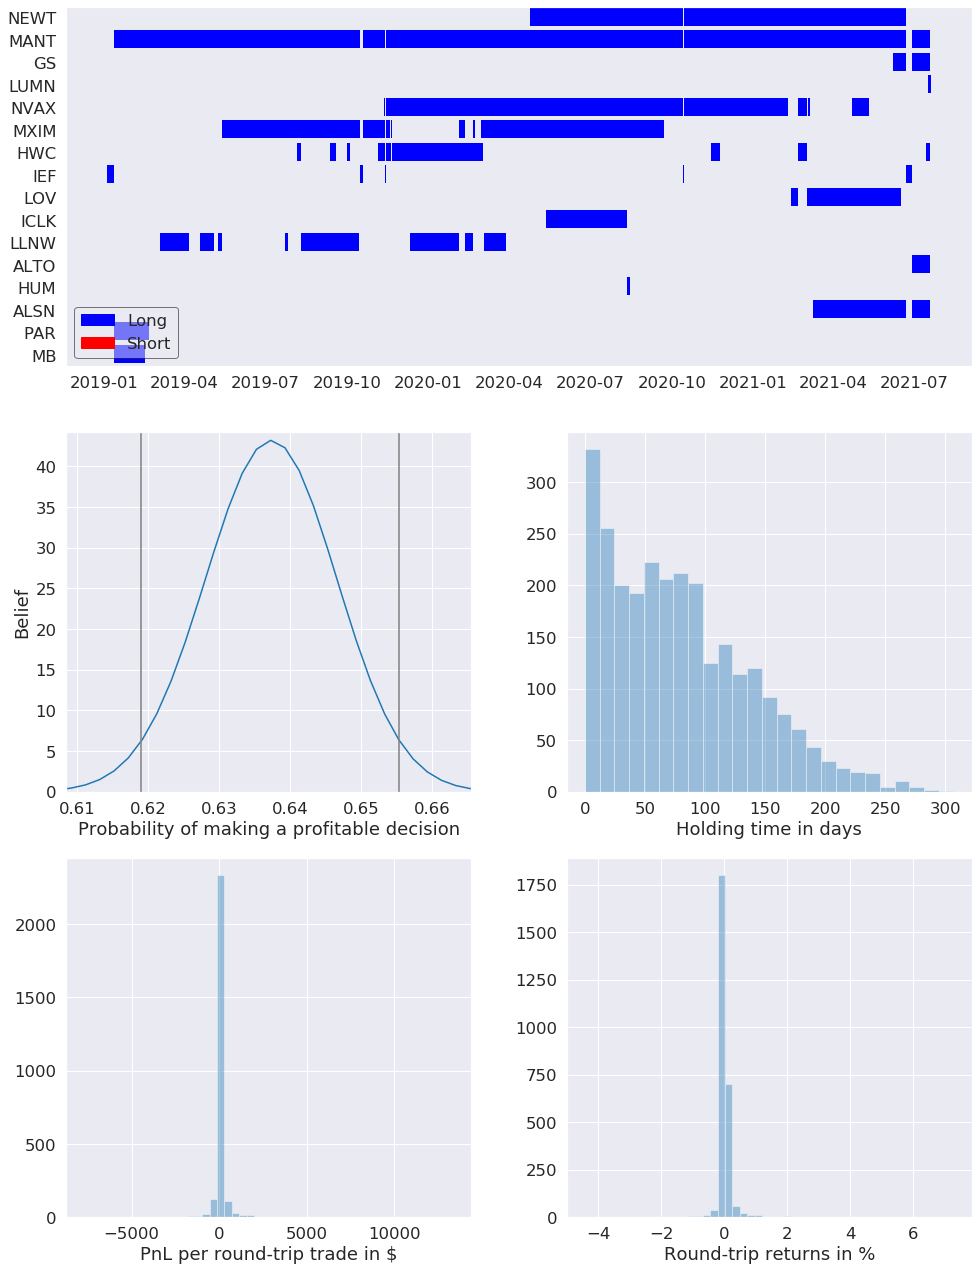

Running T model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu_minus_two_log__, volatility_log__, mean returns]
100%|██████████| 2000/2000 [00:00<00:00, 2896.58it/s]



Finished T model (required 24.33 seconds).

Running BEST model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu_minus_two_log__, group2_std_interval__, group1_std_interval__, group2_mean, group1_mean]
100%|██████████| 2500/2500 [00:09<00:00, 272.92it/s]
The acceptance probability does not match the target. It is 0.8990762356250447, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9155964386633891, but should be close to 0.8. Try to increase the number of tuning steps.



Finished BEST model (required 28.73 seconds).

Finished plotting Bayesian cone (required 0.14 seconds).


No handles with labels found to put in legend.



Finished plotting BEST results (required 0.63 seconds).

Finished computing Bayesian predictions (required 0.06 seconds).

Finished plotting Bayesian VaRs estimate (required 0.04 seconds).

Running alpha beta model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha, nu_minus_two_log__, sigma_log__]
100%|██████████| 2500/2500 [00:18<00:00, 134.55it/s]
The acceptance probability does not match the target. It is 0.9156231457376092, but should be close to 0.8. Try to increase the number of tuning steps.



Finished running alpha beta model (required 30.79 seconds).

Finished plotting alpha beta model (required 0.11 seconds).

Total runtime was 84.82 seconds.


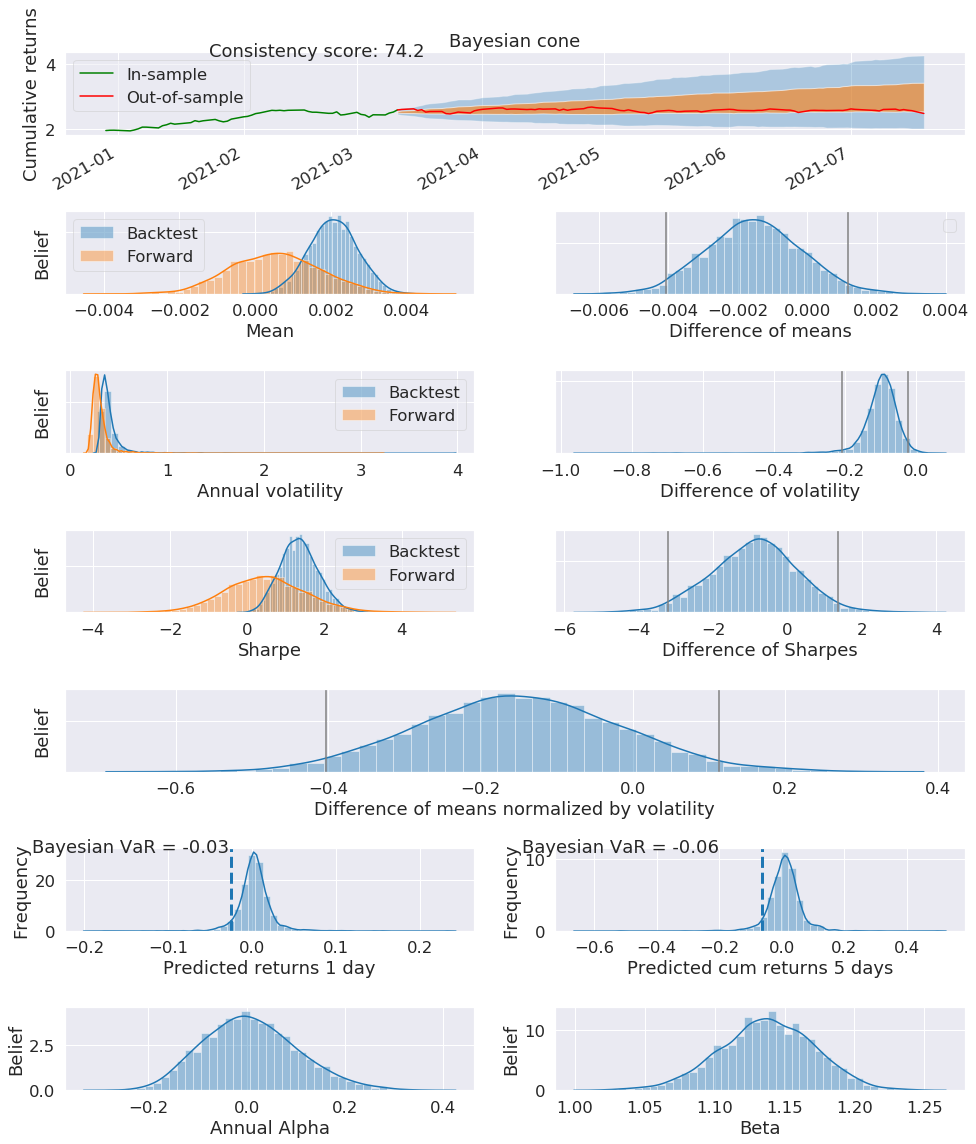

In [17]:
#%%pixie_debugger

from zipline.data import benchmarks
# Set up benchmark Asset 
spy_bm_ret    = benchmarks.get_benchmark_returns(symbol='SPY', first_date=sim_start, last_date=sim_end)
spy_bm_ret    = spy_bm_ret[sim_start:sim_end]
spy_bm_ret[0] = 0.0 # Normalize benchmark returns to start at 0.0.
perf          = perf[sim_start:sim_end]
live_start=perf.index[-90]
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
pf.create_full_tear_sheet(
                          returns, 
                          positions=positions, 
                          transactions=transactions, 
                          bootstrap=True,
                          benchmark_rets=spy_bm_ret, 
                          round_trips=True, 
                          live_start_date=live_start,
                          #live_start_date='2021-01-01',
                          bayesian=True,
                          risk=True
                         )
#orig pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, bootstrap=None,benchmark_rets=spy_bm_ret, round_trips=True)
#pf.create_simple_tear_sheet(returns=returns,positions=positions,transactions=transactions)

In [18]:
#positions